In [0]:
import glob
import pandas as pd
from google.colab import files
from google.colab import drive
import numpy as np
from tqdm import tqdm
from collections import Counter
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#Import and transformations

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Knab/Data/Knab_Analytics/DataEvents/Events"

erasmus_data_events0.csv      erasmus_data_events_2_2.csv
erasmus_data_events10.csv     erasmus_data_events_2_3.csv
erasmus_data_events11.csv     erasmus_data_events_2_4.csv
erasmus_data_events12.csv     erasmus_data_events_2_5.csv
erasmus_data_events13.csv     erasmus_data_events_2_6.csv
erasmus_data_events14.csv     erasmus_data_events_2_7.csv
erasmus_data_events15.csv     erasmus_data_events_2_8.csv
erasmus_data_events16.csv     erasmus_data_events_2_9.csv
erasmus_data_events1.csv      erasmus_data_events2.csv
erasmus_data_events_2_0.csv   erasmus_data_events3.csv
erasmus_data_events_2_10.csv  erasmus_data_events4.csv
erasmus_data_events_2_11.csv  erasmus_data_events5.csv
erasmus_data_events_2_12.csv  erasmus_data_events6.csv
erasmus_data_events_2_13.csv  erasmus_data_events7.csv
erasmus_data_events_2_14.csv  erasmus_data_events8.csv
erasmus_data_events_2_15.csv  erasmus_data_events9.csv
erasmus_data_events_2_1.csv


In [0]:
!ls "/content/drive/My Drive/Knab/Data/Articles/"

Scraped		  URLS_DANA.gsheet   URLS_LENNERT.gsheet   URL_TAGS_TEXT.xlsx
URLS_ARNO.gsheet  URLS_ERINE.gsheet  URL_TAGS_TEXT.gsheet


In [0]:
#Load in all the PAGE files
page_files = glob.glob("/content/drive/My Drive/Knab/Data/Knab_Analytics/DataEvents/Pages/*.csv")
#print(page_files)
page_dfs = [pd.read_csv(p, sep=",") for p in page_files]
page_data = pd.concat(page_dfs,ignore_index=False)
page_data.name = 'Page_Data'

In [0]:
#Load in all the PAGE files
event_files = glob.glob("/content/drive/My Drive/Knab/Data/Knab_Analytics/DataEvents/Events/*.csv")
#print(page_files)
event_dfs = [pd.read_csv(p, sep=",") for p in event_files]
event_data = pd.concat(event_dfs,ignore_index=False)
event_data.name = 'Page_Data'

In [0]:
#Load in all urls with tags
df_urlstext = pd.read_excel("/content/drive/My Drive/Knab/Data/Articles/Scraped/URLTEXT.xlsx")

In [0]:
#Split dfs
df_urls = df_urlstext[['URL','TAG','TITLE','DATE','READING_TIME']]

In [0]:
def remove_nan(all_data):
  #Remove NaN column
  all_data = all_data.loc[:, all_data.columns.notnull()]

  #Drop all NaN rows
  all_data = all_data.dropna()
  
  return all_data

In [0]:
page_data = remove_nan(page_data)
event_data = remove_nan(event_data)

In [18]:
event_data.head()

,Unnamed: 0,clientid_hashed,visitid,hitnumber,visitstarttime,pagepath,eventcategory,eventlabel,ZakPart,channelgrouping,browser,devicecategory,BiebYN
0,0,00004b86028a3bfd9ea1b900a085b2ad3ee042a53f7e53...,1542146420,9,2018-11-13 22:00:20,bieb.knab.nl/sparen-investeren/geld-investeren...,timer,180000,Particulier,Organic,Safari,mobile,1
1,1,00004b86028a3bfd9ea1b900a085b2ad3ee042a53f7e53...,1542146420,10,2018-11-13 22:00:20,bieb.knab.nl/sparen-investeren/geld-investeren...,timer,30000,Particulier,Organic,Safari,mobile,1
2,2,00004b86028a3bfd9ea1b900a085b2ad3ee042a53f7e53...,1542146420,11,2018-11-13 22:00:20,bieb.knab.nl/sparen-investeren/geld-investeren...,Scroll Depth,25%,Particulier,Organic,Safari,mobile,1
3,3,00004b86028a3bfd9ea1b900a085b2ad3ee042a53f7e53...,1542184675,1,2018-11-14 08:37:55,bieb.knab.nl/sparen-investeren/geld-investeren...,timer,30000,Particulier,Organic,Safari,mobile,1
4,4,00004b86028a3bfd9ea1b900a085b2ad3ee042a53f7e53...,1542184675,2,2018-11-14 08:37:55,bieb.knab.nl/sparen-investeren/geld-investeren...,timer,180000,Particulier,Organic,Safari,mobile,1


In [0]:
#Change data types
#Integers
page_data['visitid'] = page_data['visitid'].astype('int64')
page_data['hitnumber'] = page_data['hitnumber'].astype('int64')
page_data['time'] = page_data['time'].astype('int64')
page_data['BiebYN'] = page_data['BiebYN'].astype('int64')

#Strings
page_data['clientid_hashed'] = page_data['clientid_hashed'].astype('str')
page_data['pagepath'] = page_data['pagepath'].astype('str')
page_data['channelgrouping'] = page_data['channelgrouping'].astype('str')
page_data['browser'] = page_data['browser'].astype('str')
page_data['devicecategory'] = page_data['devicecategory'].astype('str')
df_urls['URL'] = df_urls['URL'].astype('str')
df_urls['TAG'] = df_urls['TAG'].astype('str')
df_urls['TITLE'] = df_urls['TITLE'].astype('str')
df_urls['READING_TIME'] = df_urls['READING_TIME'].astype('str')

#Datetime
page_data['visitstarttime'] = pd.to_datetime(page_data['visitstarttime'])
df_urls['DATE'] = pd.to_datetime(df_urls['DATE'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [0]:
#Sort chronologically
page_data = page_data.sort_values(by=['visitstarttime'])

In [0]:
#Drop index column and reindex
page_data = page_data.drop(['Unnamed: 0'], axis = 1)
page_data = page_data.reset_index(drop=True)

#Calculate the amount of 1-click users

In [0]:
#Only select bieb visits
onlybiebs = page_data.loc[page_data['BiebYN'] == 1]

In [0]:
#Group on clientid and count their pages on bieb
visit_biebYN = onlybiebs.groupby(['clientid_hashed'])['BiebYN'].value_counts() #Every visitid made by certain clientid, counting pages in bieb and out of bieb per visitid

#List of counts
counts = list(visit_biebYN)

In [0]:
#Calculate histogram of how often a clientid has visited bieb
np.histogram(counts, bins = max(counts)-1)

(array([521977, 150805,  58670,  28867,  15827,   9800,   6010,   4189,
          2908,   2073,   1568,   1165,    901,    718,    561,    474,
           395,    297,    276,    219,    179,    167,    117,    120,
           103,     77,     79,     64,     54,     39,     45,     39,
            39,     20,     31,     24,     20,     18,     12,     14,
            12,     13,     12,      9,     10,      9,     13,      0,
            11,      2,      7,      1,     10,      4,      3,      5,
             5,      2,      2,      1,      1,      1,      3,      0,
             4,      1,      0,      3,      1,      1,      1,      2,
             2,      0,      2,      1,      2,      1,      3,      1,
             0,      1,      2,      1,      2,      1,      1,      0,
             1,      2,      0,      0,      0,      1,      1,      0,
             0,      0,      0,      0,      1,      0,      0,      0,
             0,      1,      0,      0,      0,      0,      0, 

In [0]:
np.set_printoptions(suppress=True) #Surpresses scientific notation
np.histogram(counts, bins = max(counts)-1)[0]/sum(np.histogram(counts, bins = max(counts)-1)[0]) # Calculate percentage of users for every occurence

array([0.64508742, 0.18637298, 0.07250756, 0.0356754 , 0.01955986,
       0.01211137, 0.00742748, 0.00517699, 0.00359386, 0.00256193,
       0.00193782, 0.00143977, 0.0011135 , 0.00088734, 0.00069331,
       0.00058579, 0.00048816, 0.00036705, 0.0003411 , 0.00027065,
       0.00022122, 0.00020639, 0.00014459, 0.0001483 , 0.00012729,
       0.00009516, 0.00009763, 0.00007909, 0.00006674, 0.0000482 ,
       0.00005561, 0.0000482 , 0.0000482 , 0.00002472, 0.00003831,
       0.00002966, 0.00002472, 0.00002225, 0.00001483, 0.0000173 ,
       0.00001483, 0.00001607, 0.00001483, 0.00001112, 0.00001236,
       0.00001112, 0.00001607, 0.        , 0.00001359, 0.00000247,
       0.00000865, 0.00000124, 0.00001236, 0.00000494, 0.00000371,
       0.00000618, 0.00000618, 0.00000247, 0.00000247, 0.00000124,
       0.00000124, 0.00000124, 0.00000371, 0.        , 0.00000494,
       0.00000124, 0.        , 0.00000371, 0.00000124, 0.00000124,
       0.00000124, 0.00000247, 0.00000247, 0.        , 0.00000

#Calculate the amount of articles with few views

In [22]:
df_urls

,URL,TAG,TITLE,DATE,READING_TIME
0,bieb.knab.nl/betalen-sparen/kosten-van-creditc...,inkomsten-uitgaven,Kosten van creditcards vergelijken: waar moet ...,2018-08-27,4 minuten
1,bieb.knab.nl/btw-terugvragen-op-zonnepanelen-i...,geld-besparen,Btw terugvragen op zonnepanelen: in 3 stappen ...,2018-12-28,3 minuten
2,bieb.knab.nl/eigenwoningforfait-wat-betekent-d...,huiseigenaar,Eigenwoningforfait: wat betekent de afschaffin...,2018-01-16,4 minuten
3,bieb.knab.nl/hypotheekadvies/huis-kopen-voor-s...,hypotheken,Huis kopen voor studerend kind?,2018-09-10,3 minuten
4,bieb.knab.nl/hypotheken//betalen-uit-een-bouwd...,hypotheken,Betalen uit een bouwdepot: wat wel en wat niet?,2018-12-13,3 minuten
5,bieb.knab.nl/hypotheken//huis-verkocht-en-nu,voorlopig-koopcontract,"Huis verkocht, en nu?",2018-10-15,3 minuten
6,bieb.knab.nl/hypotheken//kosten-koper-bij-over...,bijkomende-kosten,Kosten koper bij overdracht huis: wat betaal j...,2018-08-30,3 minuten
7,bieb.knab.nl/hypotheken/6-dingen-die-je-altijd...,huiseigenaar,6 dingen die je altijd al wilde weten over hyp...,2018-04-13,4 minuten
8,bieb.knab.nl/hypotheken/6-dingen-die-je-moet-w...,hypotheek-regelen,6 dingen die je moet weten over bankgarantie,2018-09-25,3 minuten
9,bieb.knab.nl/hypotheken/6-vragen-die-zzpers-st...,hypotheek-als-zzper,6 vragen die zzp’ers het meest stellen over ee...,2018-11-08,5 minuten


In [0]:
#Add zero column to count
df_urls['COUNT'] = 0
countlist = df_urls[['URL', 'COUNT','TAG']]

In [24]:
#THIS IS NOT VERY CLEAN
#Find every occurence when a visited page is one of the articles
counter = []
for i in tqdm(range(0,len(onlybiebs['pagepath'].values))):
  if onlybiebs['pagepath'].values[i] in df_urls['URL'].values:
    counter.append(onlybiebs['pagepath'].values[i])

#Sum up all duplicates
count_dict = dict(Counter(counter))

100%|██████████| 1513484/1513484 [00:59<00:00, 25276.39it/s]


In [25]:
#Replace counts in countlist: From dict to dataframe
for i in tqdm(range(0,len(countlist))):
  if countlist['URL'][i] in count_dict:
    countlist['COUNT'][i] = count_dict[countlist['URL'][i]]
  else:
    countlist['COUNT'][i] = 0
  

  0%|          | 0/789 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
100%|██████████| 789/789 [02:25<00:00,  5.45it/s]


In [0]:
#Sort urls by most visited
countlist.sort_values(['COUNT'], ascending=False).to_csv('counts.csv', index=False)  # To save .to_csv('counts.csv', index=False)

In [27]:
#Most read article
countlist['URL'][718]

'bieb.knab.nl/sparen-investeren/belastingvrij-sparen-in-2018-wat-is-er-veranderd'

In [28]:
#Calculate the amount of articles that have less than 10 views
less_than_ten = countlist.loc[countlist['COUNT'] < 10]
len(less_than_ten)/len(countlist)

0.058301647655259824

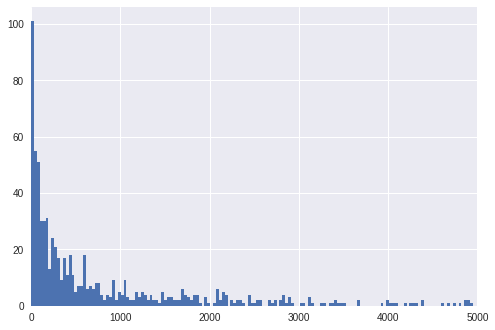

In [0]:
#Histogram of how often articles are read
plt.hist(countlist['COUNT'].values, 1500) #Calculate all bins
#Actually show the plot
plt.xlim(0,5000) #Only show values lower than ...
plt.show()

In [0]:
#Add the counts to the URL list
df_urls['COUNT'] = countlist['COUNT']

#Find interesting info

In [0]:
df_test = onlybiebs[onlybiebs.pagepath.isin(df_urls.URL)] #test snellere manier om alle articles te selecteren in onlybiebs die voorkomen in de url excel

In [0]:
df_test

In [0]:
#Reference the clicks to the article list.
page_data = page_data.assign(ArticleYN=page_data.pagepath.isin(df_urls.URL).astype(int))

In [31]:
#Percentage of views in the bieb that are actually articles
sum(page_data['ArticleYN'].values)/sum(page_data['BiebYN'].values)*100

75.76763282598297

In [32]:
#Percentage of views on knab website that are actually articles
sum(page_data['ArticleYN'].values)/len(page_data)*100

51.244295109468204

In [33]:
#Percentage of bieb on knab website
sum(page_data['BiebYN'].values)/len(page_data)*100

67.63349097517934

In [34]:
#Percentage of article readers that are 1 article-viewers
article_readers = page_data[page_data['ArticleYN'] == 1]
articles_read_by_client = list(article_readers.groupby(['clientid_hashed'])['ArticleYN'].count())
articles_read_by_client.count(1)/len(articles_read_by_client)*100

70.07629056057722

In [0]:
#Number of one time readers
articles_read_by_client.count(1)

491054

In [0]:
#Number of article readers
len(articles_read_by_client)

700742

In [0]:
#Number of article clicks
sum(page_data['ArticleYN'])

1146731

In [0]:
#Number of clicks in the Bieb
sum(page_data['BiebYN'].values)

1513484

In [0]:
#Number of total clicks
len(page_data)

2237773

In [0]:
#Actually useful datapoints
sum(page_data['ArticleYN'])-articles_read_by_client.count(1)

655677

In [0]:
#Average amount of clicks except with 1clickers
(sum(page_data['ArticleYN'])-articles_read_by_client.count(1))/(len(articles_read_by_client)-articles_read_by_client.count(1))

3.1269171340276984

In [0]:
#Rename the columns - Easier merging
article_readers.rename(columns={'clientid_hashed': 'clientid_hashed', 'visitid': 'visitid', 'visitstarttime': 'visitstarttime', 'hitnumber': 'hitnumber', 'time': 'time', 'pagepath': 'URL', 'channelgrouping': 'channelgrouping', 'browser': 'browser', 'devicecategory': 'devicecategory', 'BiebYN': 'BiebYN', 'ArticleYN': 'ArticleYN'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [0]:
#Merge and drop count list
article_readers = article_readers.merge(df_urls, how='left')
article_readers.drop(['COUNT'], axis=1)

,clientid_hashed,visitid,visitstarttime,hitnumber,time,URL,channelgrouping,browser,devicecategory,BiebYN,ArticleYN,TAG,TITLE,DATE,READING_TIME
0,de11f9ca36126c3a39d5fa1cdab8819d1462453ff3db50...,1535752763,2018-08-31 22:00:00,11,17165,bieb.knab.nl/hypotheken/meerwerk-nieuwbouw-mee...,Organic,Safari,desktop,1,1,nieuwbouw,Meerwerk nieuwbouw meefinancieren: wat zijn de...,2018-12-28,3 minuten
1,de11f9ca36126c3a39d5fa1cdab8819d1462453ff3db50...,1535752763,2018-08-31 22:00:00,20,33842,bieb.knab.nl/hypotheken/meerwerk-nieuwbouw-wat...,Organic,Safari,desktop,1,1,nieuwbouw,Meerwerk nieuwbouw: wat houdt het in en waar m...,2018-12-28,3 minuten
2,3f7603049a01434cf55d1f7cfd4d70b2e1fdf2172b44fc...,1535752712,2018-08-31 22:00:21,9,0,bieb.knab.nl/hypotheken/bankgarantie-waarborgs...,Organic,Safari,mobile,1,1,hypotheek-regelen,Bankgarantie waarborgsom: wat is het en hoe re...,2018-09-21,3 minuten
3,34986ac6a854de3f209d274ff8af0c38ed2b46da59282c...,1535752825,2018-08-31 22:00:25,1,0,bieb.knab.nl/hypotheken/verborgen-gebreken-in-...,Organic,Safari,mobile,1,1,eerste-huis-kopen,Verborgen gebreken in huis: wat betekent dat e...,2018-08-27,4 minuten
4,d11f3bf3eb0e3ec596f8db72a2674cb34ce8ab4f558f63...,1535752861,2018-08-31 22:01:01,1,0,bieb.knab.nl/ondernemen/hypotheeklening-denk-a...,Organic,Chrome,mobile,1,1,financiën-regelen,Hypotheeklening? Denk aan je BV!,2017-11-28,2 minuten
5,b8a0159cfcc9ee8d9486aa5aca41b306bed806edfef850...,1535751099,2018-08-31 22:01:18,58,618818,bieb.knab.nl/inkomsten-uitgaven/pinnen-in-het-...,Organic,Firefox,desktop,1,1,betalen,Pinnen in het buitenland: waar moet je op letten?,2018-09-21,2 minuten
6,28e44b624774c7594d6a239f014f73619723fc3ea2523f...,1535751916,2018-08-31 22:01:26,10,0,bieb.knab.nl/hypotheken/bieden-boven-vraagprij...,Organic,Samsung Internet,mobile,1,1,bezichtigen-bieden,Bieden boven vraagprijs huis: waar moet je op ...,2018-12-27,4 minuten
7,1d8b57225a6766e9efc4506abd5eb66f57876dde2a926d...,1535752924,2018-08-31 22:02:04,1,0,bieb.knab.nl/hypotheken/einde-hypotheekrenteaf...,Organic,Safari,desktop,1,1,hypotheek-wijzigen,Einde hypotheekrenteaftrek: pas op je aflossin...,2018-04-03,4 minuten
8,8e0d60c274eb4b5d8920f1372c98b501c2e13e88829436...,1535752934,2018-08-31 22:02:14,1,0,bieb.knab.nl/hypotheken/hypotheek-en-studiesch...,Organic,Safari,mobile,1,1,eerste-huis-kopen,Hypotheek en studieschuld: gaan die twee samen?,2018-12-13,2 minuten
9,e46e626963609114de41b1a25dcb4488622d7fa1b22e53...,1535752936,2018-08-31 22:02:16,1,0,bieb.knab.nl/hypotheken/bouwdepot-nieuwbouw-ho...,Organic,Chrome,desktop,1,1,nieuwbouw,Bouwdepot nieuwbouw: hoe zit het met de kosten?,2017-10-02,4 minuten


In [0]:
article_readers.groupby(['TAG']).agg(['count'])['clientid_hashed']

,count
TAG,
alternatief-voor-sparen,18139
bedrijfsfinanciering,1765
beginnen-met-beleggen,10618
betalen,34741
bezichtigen-bieden,141045
bijkomende-kosten,90793
crowdfunding-investeren,1466
eerste-huis-kopen,116783
eigen-bedrijf-uitbreiden,296


#Pipeline: export data to find old recommendations
We need to export all the data, with a merge between url and all_data

In [0]:
page_data = page_data.merge(df_urls, how='left')
export_data = page_data.drop(['COUNT'], axis=1)

In [0]:
#Export to CSV file
export_data.to_csv("merged_data.csv", index=False)
#Open tab on left and download csv file